## ○ Descriptive Statistics

## Step 1 — Headline length statistics

COMPREHENSIVE FINANCIAL NEWS ANALYSIS

📁 1. LOADING AND PREPARING DATA...
--------------------------------------------------
Converting date format and setting index...
✅ Data prepared: 1,407,328 articles from 2011-04-28 to 2020-06-11


📊 2. DESCRIPTIVE STATISTICS

2.1 TEXTUAL LENGTH STATISTICS
----------------------------------------
Headline Length Statistics:
• Count: 1,407,328.0
• Mean: 73.1 characters
• Std: 40.7
• Min: 3.0 characters
• 25%: 47.0 characters
• 50%: 64.0 characters
• 75%: 87.0 characters
• Max: 512.0 characters


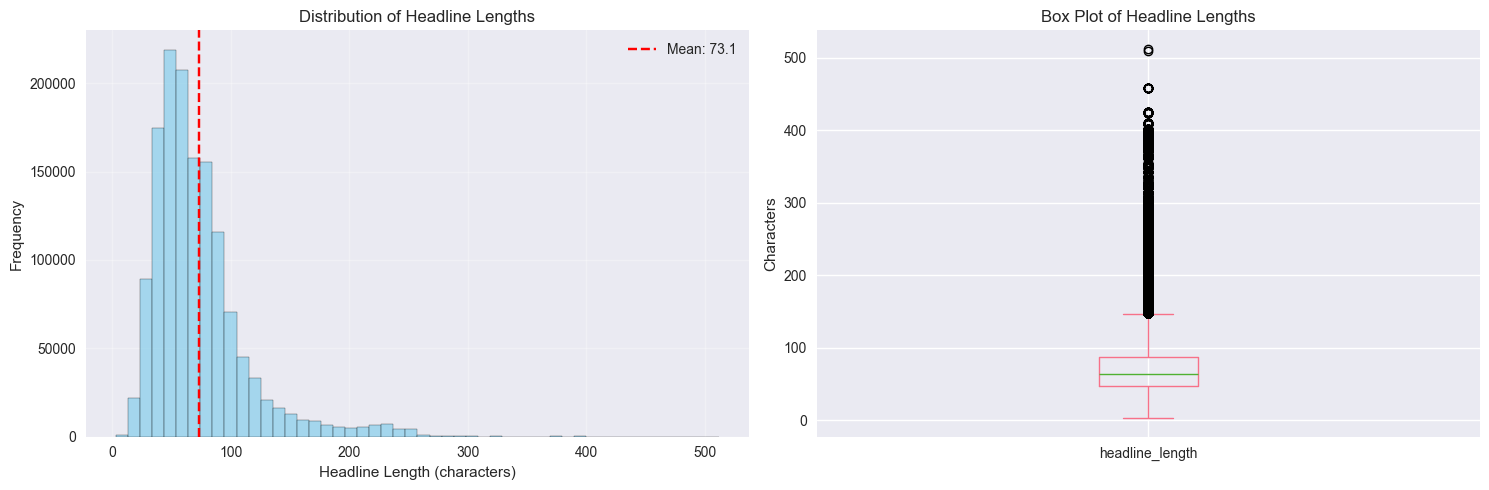


2.2 PUBLISHER ACTIVITY ANALYSIS
----------------------------------------
Total unique publishers: 1,034

Top 15 Most Active Publishers:
--------------------------------------------------
 1. Paul Quintaro                             228,373 articles ( 16.2%)
 2. Lisa Levin                                186,979 articles ( 13.3%)
 3. Benzinga Newsdesk                         150,484 articles ( 10.7%)
 4. Charles Gross                              96,732 articles (  6.9%)
 5. Monica Gerson                              82,380 articles (  5.9%)
 6. Eddie Staley                               57,254 articles (  4.1%)
 7. Hal Lindon                                 49,047 articles (  3.5%)
 8. ETF Professor                              28,489 articles (  2.0%)
 9. Juan Lopez                                 28,438 articles (  2.0%)
10. Benzinga Staff                             28,114 articles (  2.0%)
11. Vick Meyer                                 24,826 articles (  1.8%)
12. webmaster       

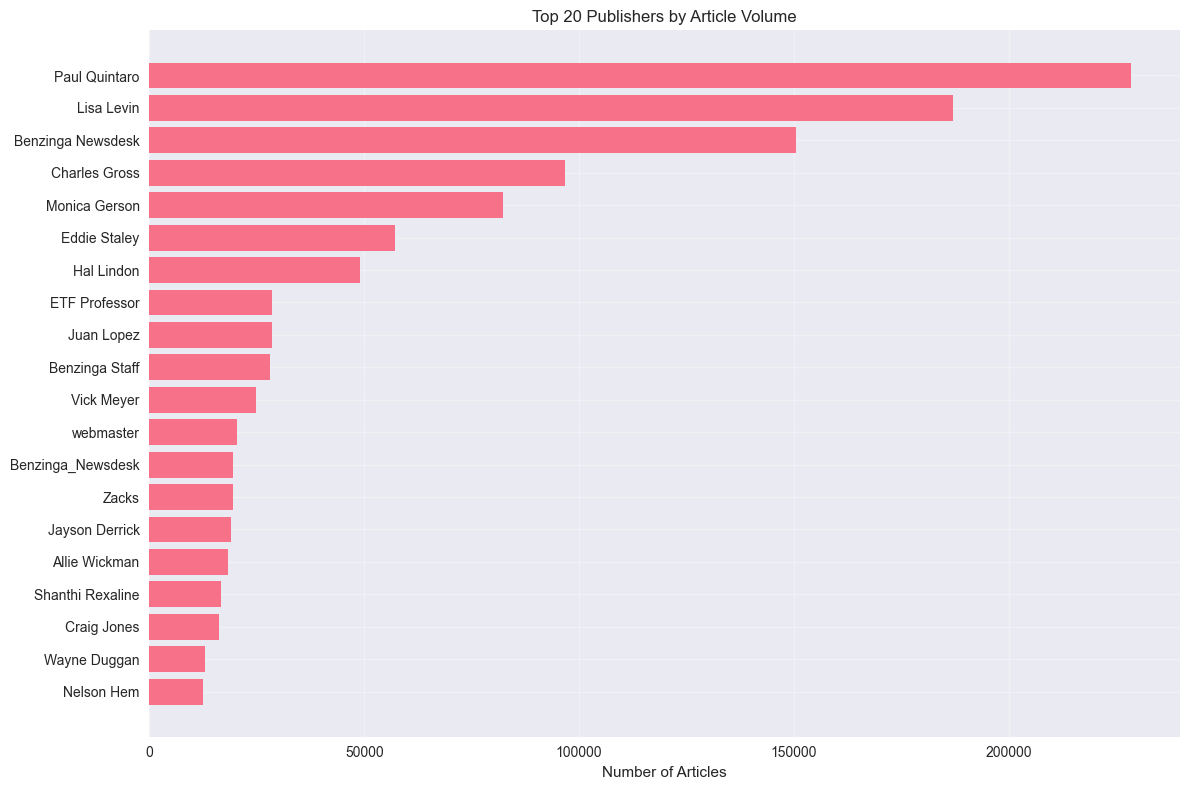


2.3 TEMPORAL PUBLICATION PATTERNS
---------------------------------------------

Articles by Day of Week:
• Monday      :   10,297 articles (  0.7%)
• Tuesday     :   11,037 articles (  0.8%)
• Wednesday   :   11,873 articles (  0.8%)
• Thursday    :   12,712 articles (  0.9%)
• Friday      :    9,407 articles (  0.7%)
• Saturday    :      273 articles (  0.0%)
• Sunday      :      388 articles (  0.0%)

Articles by Hour of Day (Top 5):
• 14:00 - 15:00:  7,669 articles (  0.5%)
• 13:00 - 14:00:  5,965 articles (  0.4%)
• 16:00 - 17:00:  5,732 articles (  0.4%)
• 15:00 - 16:00:  5,701 articles (  0.4%)
• 12:00 - 13:00:  5,527 articles (  0.4%)


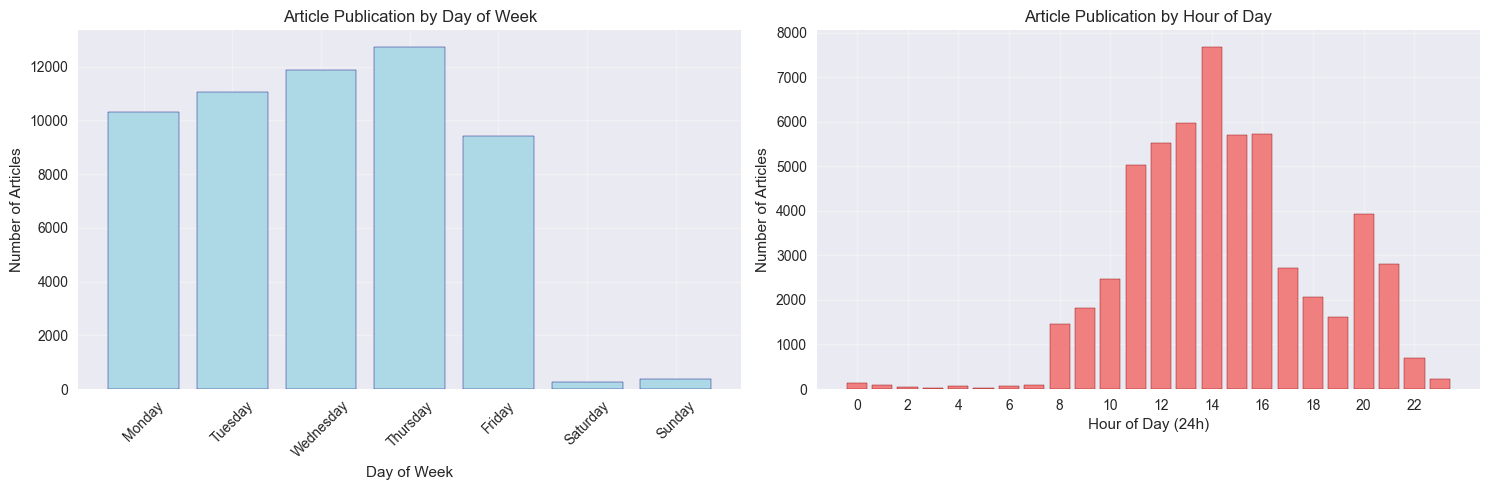



🔤 3. TEXT ANALYSIS - TOPIC MODELING

3.1 KEYWORD AND PHRASE EXTRACTION
---------------------------------------------
Most Common Financial Topics in Headlines:
--------------------------------------------------
• Analyst Ratings     : 336,444 occurrences (23.9%)
• Earnings            : 267,066 occurrences (19.0%)
• Price Targets       : 48,260 occurrences ( 3.4%)
• Dividends           : 27,469 occurrences ( 2.0%)
• Mergers Acquisitions: 24,710 occurrences ( 1.8%)
• Stock Movements     : 11,767 occurrences ( 0.8%)
• Fda Approvals       :  4,537 occurrences ( 0.3%)


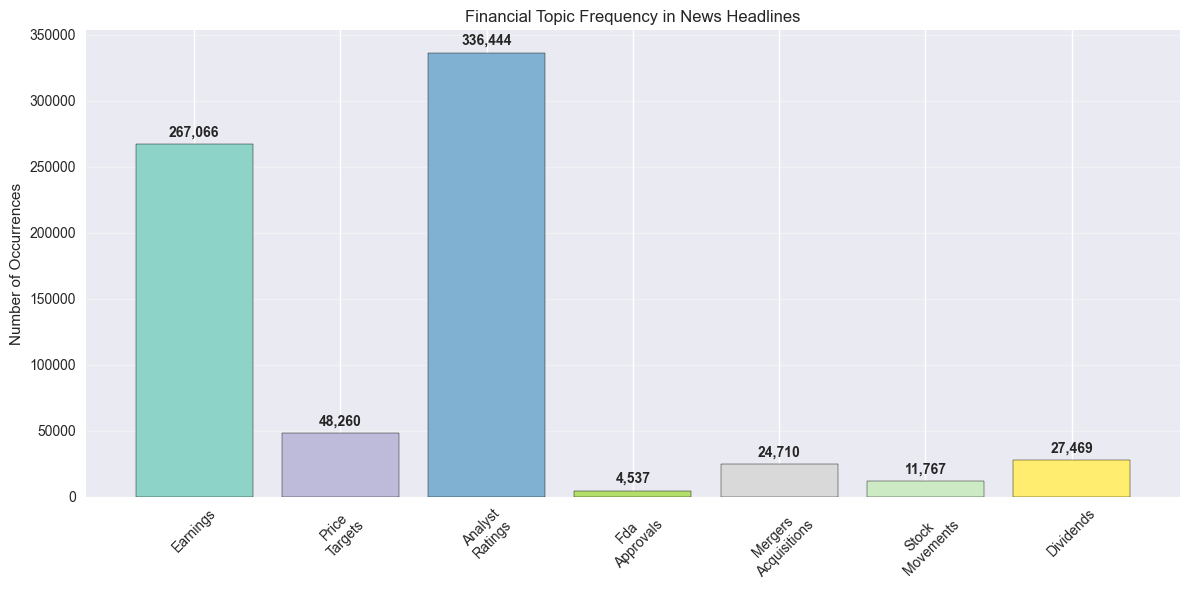


3.2 SPECIFIC FINANCIAL TERM ANALYSIS
---------------------------------------------
Specific Financial Term Analysis:
• 'earnings    ': 86,626 occurrences ( 6.2%)
• 'downgrade   ': 67,062 occurrences ( 4.8%)
• 'upgrade     ': 62,091 occurrences ( 4.4%)
• 'price target': 47,634 occurrences ( 3.4%)
• 'dividend    ': 21,572 occurrences ( 1.5%)
• 'FDA         ': 11,382 occurrences ( 0.8%)


📈 4. TIME SERIES ANALYSIS

4.1 PUBLICATION FREQUENCY OVER TIME
---------------------------------------------
Time Series Statistics:
• Daily average: 16.8 articles
• Daily std: 60.1
• Maximum daily articles: 973 on 2020-03-12
• Minimum daily articles: 0 on 2011-05-04


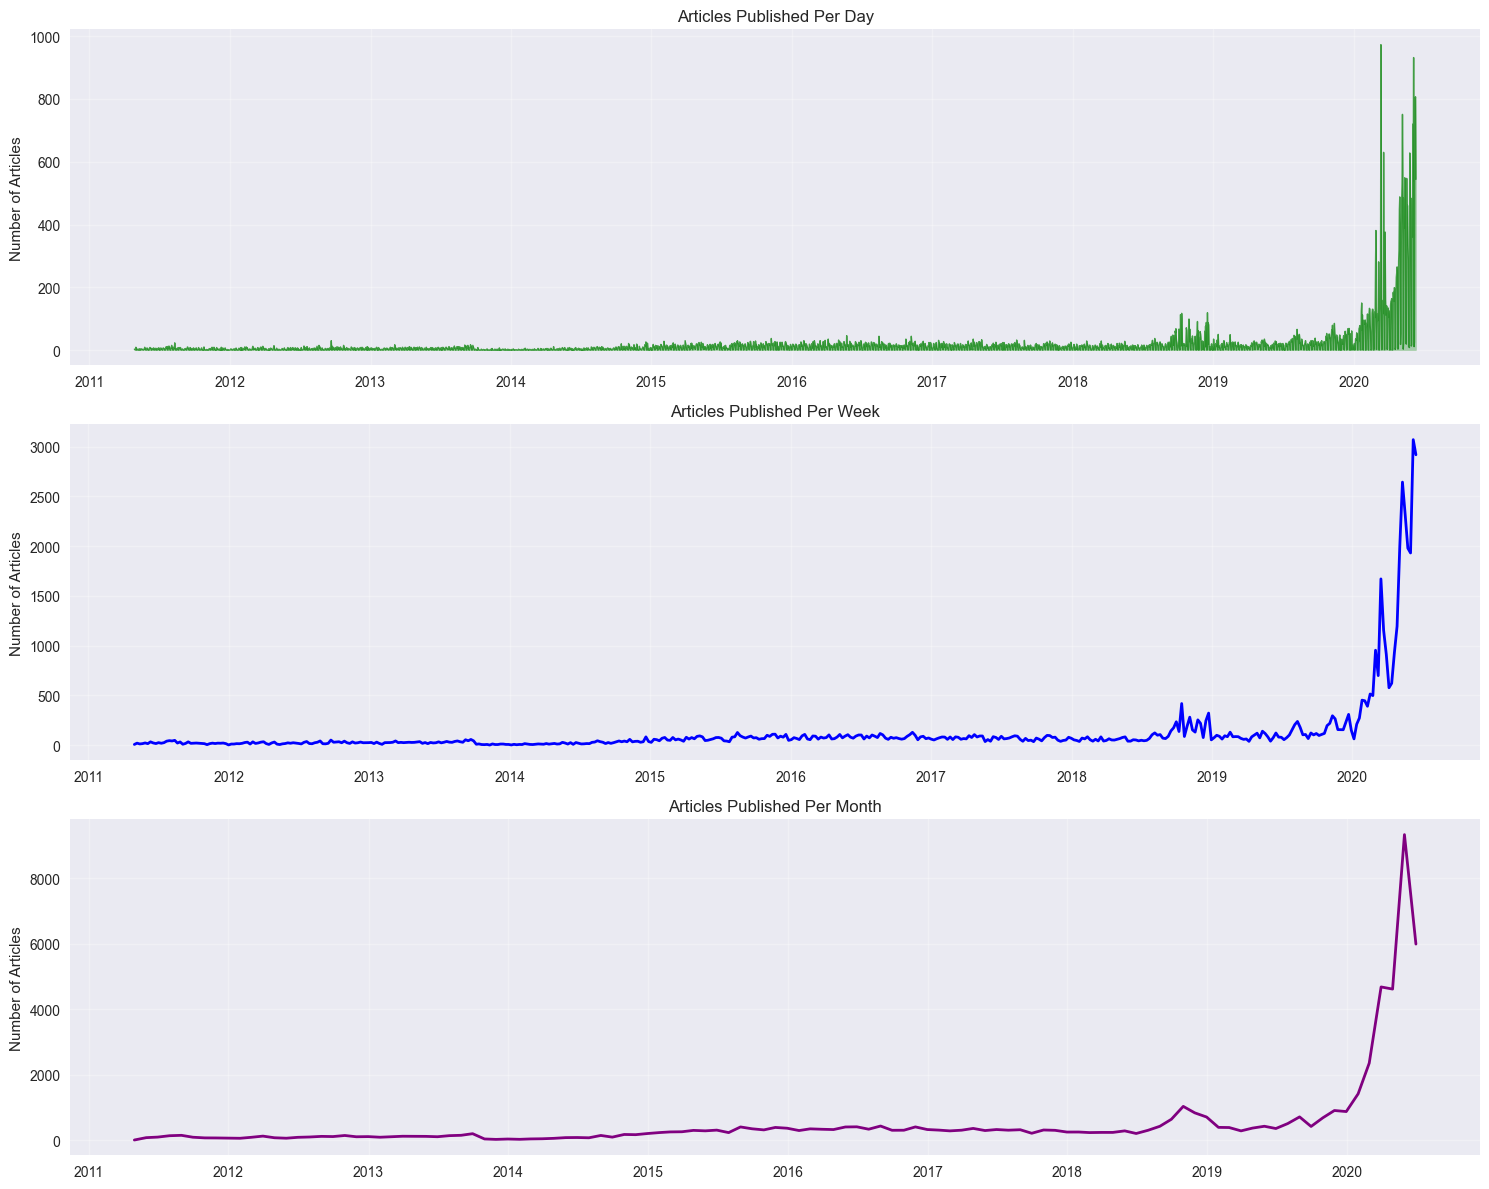


4.2 VOLATILITY AND SPIKES ANALYSIS
---------------------------------------------
Significant publication spikes (> 758.1 articles/week):
------------------------------------------------------------
• 2020-03-01: 954 articles
• 2020-03-15: 1671 articles
• 2020-03-22: 1155 articles
• 2020-03-29: 911 articles
• 2020-04-19: 928 articles
• 2020-04-26: 1195 articles
• 2020-05-03: 1994 articles
• 2020-05-10: 2644 articles
• 2020-05-17: 2320 articles
• 2020-05-24: 1980 articles
• 2020-05-31: 1932 articles
• 2020-06-07: 3071 articles
• 2020-06-14: 2919 articles


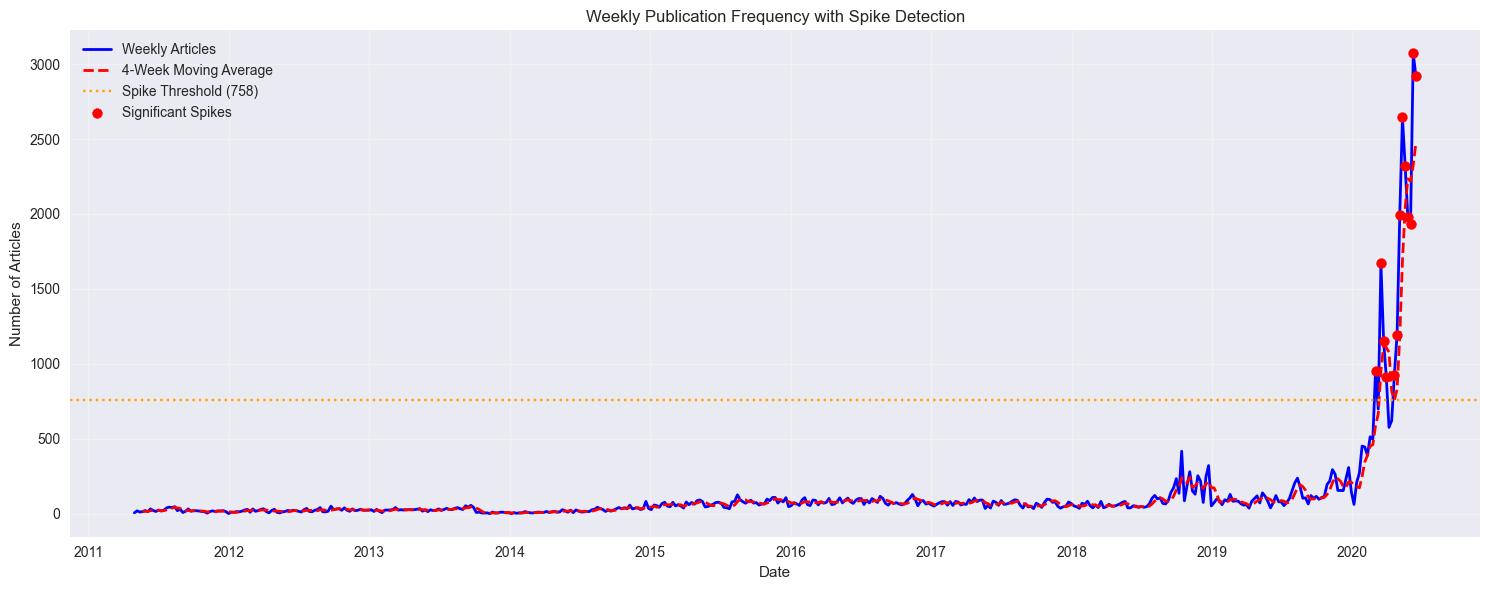


4.3 SEASONAL PATTERNS
-----------------------------------
Average Articles by Month:


TypeError: list indices must be integers or slices, not float

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("=" * 80)
print("COMPREHENSIVE FINANCIAL NEWS ANALYSIS")
print("=" * 80)

# =============================================================================
# 1. DATA LOADING AND PREPARATION
# =============================================================================
print("\n📁 1. LOADING AND PREPARING DATA...")
print("-" * 50)

# Load your data
news_df = pd.read_csv("../data/raw_analyst_ratings.csv")

print(f"Original data shape: {news_df.shape}")
print(f"Columns: {news_df.columns.tolist()}")

# Convert date to datetime and set as index
print("Converting date format and setting index...")
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce', utc=True)

# Drop rows with invalid dates
initial_count = len(news_df)
news_df = news_df.dropna(subset=['date'])
print(f"Removed {initial_count - len(news_df)} rows with invalid dates")

news_df.set_index('date', inplace=True)

# Add additional time-based features (convert to integers to avoid float issues)
news_df['day_of_week'] = news_df.index.day_name()
news_df['hour'] = news_df.index.hour.astype(int)  # Convert to integer
news_df['month'] = news_df.index.month.astype(int)  # Convert to integer
news_df['year'] = news_df.index.year.astype(int)  # Convert to integer
news_df['headline_length'] = news_df['headline'].str.len()

print(f"✅ Data prepared: {len(news_df):,} articles from {news_df.index.min().strftime('%Y-%m-%d')} to {news_df.index.max().strftime('%Y-%m-%d')}")

# =============================================================================
# 2. DESCRIPTIVE STATISTICS
# =============================================================================
print("\n\n📊 2. DESCRIPTIVE STATISTICS")
print("=" * 60)

print("\n2.1 TEXTUAL LENGTH STATISTICS")
print("-" * 40)

text_stats = news_df['headline_length'].describe()
print(f"Headline Length Statistics:")
print(f"• Count: {text_stats['count']:,}")
print(f"• Mean: {text_stats['mean']:.1f} characters")
print(f"• Std: {text_stats['std']:.1f}")
print(f"• Min: {text_stats['min']} characters")
print(f"• 25%: {text_stats['25%']:.1f} characters")
print(f"• 50%: {text_stats['50%']:.1f} characters")
print(f"• 75%: {text_stats['75%']:.1f} characters")
print(f"• Max: {text_stats['max']} characters")

# Plot headline length distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(news_df['headline_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(text_stats['mean'], color='red', linestyle='--', label=f'Mean: {text_stats["mean"]:.1f}')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
news_df['headline_length'].plot(kind='box')
plt.title('Box Plot of Headline Lengths')
plt.ylabel('Characters')

plt.tight_layout()
plt.show()

print("\n2.2 PUBLISHER ACTIVITY ANALYSIS")
print("-" * 40)

publisher_counts = news_df['publisher'].value_counts()
print(f"Total unique publishers: {len(publisher_counts):,}")

print(f"\nTop 15 Most Active Publishers:")
print("-" * 50)
for i, (publisher, count) in enumerate(publisher_counts.head(15).items(), 1):
    percentage = (count / len(news_df)) * 100
    print(f"{i:2d}. {publisher:<40} {count:>8,} articles ({percentage:>5.1f}%)")

# Plot publisher activity
plt.figure(figsize=(12, 8))
top_20_publishers = publisher_counts.head(20)
plt.barh(range(len(top_20_publishers)), top_20_publishers.values)
plt.yticks(range(len(top_20_publishers)), top_20_publishers.index)
plt.xlabel('Number of Articles')
plt.title('Top 20 Publishers by Article Volume')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n2.3 TEMPORAL PUBLICATION PATTERNS")
print("-" * 45)

# Day of week analysis
day_counts = news_df['day_of_week'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(day_order)

print("\nArticles by Day of Week:")
for day, count in day_counts.items():
    percentage = (count / len(news_df)) * 100
    print(f"• {day:<12}: {count:>8,} articles ({percentage:>5.1f}%)")

# Hour of day analysis
hour_counts = news_df['hour'].value_counts().sort_index()

print("\nArticles by Hour of Day (Top 5):")
for hour, count in hour_counts.nlargest(5).items():
    percentage = (count / len(news_df)) * 100
    hour_int = int(hour)  # Convert to integer for formatting
    next_hour = (hour_int + 1) % 24
    print(f"• {hour_int:02d}:00 - {next_hour:02d}:00: {count:>6,} articles ({percentage:>5.1f}%)")

# Plot temporal patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Day of week plot
ax1.bar(day_counts.index, day_counts.values, color='lightblue', edgecolor='navy')
ax1.set_title('Article Publication by Day of Week')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Number of Articles')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Hour of day plot
hour_counts_index = [int(h) for h in hour_counts.index]  # Convert to integers
ax2.bar(hour_counts_index, hour_counts.values, color='lightcoral', edgecolor='darkred')
ax2.set_title('Article Publication by Hour of Day')
ax2.set_xlabel('Hour of Day (24h)')
ax2.set_ylabel('Number of Articles')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

# =============================================================================
# 3. TEXT ANALYSIS (TOPIC MODELING)
# =============================================================================
print("\n\n🔤 3. TEXT ANALYSIS - TOPIC MODELING")
print("=" * 60)

print("\n3.1 KEYWORD AND PHRASE EXTRACTION")
print("-" * 45)

# Define financial keywords and topics to search for
financial_keywords = {
    'earnings': ['earnings', 'profit', 'revenue', 'eps', 'quarterly results'],
    'price_targets': ['price target', 'target price', 'raised to', 'lowered to', 'maintained at'],
    'analyst_ratings': ['upgrade', 'downgrade', 'initiate coverage', 'maintain', 'buy', 'sell', 'hold'],
    'fda_approvals': ['fda approval', 'fda clears', 'regulatory approval', 'clinical trial'],
    'mergers_acquisitions': ['merger', 'acquisition', 'takeover', 'buyout', 'acquires'],
    'stock_movements': ['stock up', 'stock down', 'surges', 'plunges', 'jumps', 'falls'],
    'dividends': ['dividend', 'payout', 'yield', 'dividend increase']
}

def count_keyword_occurrences(text, keywords):
    """Count occurrences of keywords in text (case insensitive)"""
    text_lower = str(text).lower()
    return sum(1 for keyword in keywords if keyword in text_lower)

# Count occurrences for each category
keyword_counts = {}
for category, keywords in financial_keywords.items():
    count = news_df['headline'].apply(lambda x: count_keyword_occurrences(x, keywords)).sum()
    keyword_counts[category] = count

print("Most Common Financial Topics in Headlines:")
print("-" * 50)
for category, count in sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / len(news_df)) * 100
    print(f"• {category.replace('_', ' ').title():<20}: {count:>6,} occurrences ({percentage:>4.1f}%)")

# Plot keyword frequencies
plt.figure(figsize=(12, 6))
categories = list(keyword_counts.keys())
counts = list(keyword_counts.values())
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))

bars = plt.bar(range(len(categories)), counts, color=colors, edgecolor='black')
plt.xticks(range(len(categories)), [cat.replace('_', '\n').title() for cat in categories], rotation=45)
plt.ylabel('Number of Occurrences')
plt.title('Financial Topic Frequency in News Headlines')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01, 
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n3.2 SPECIFIC FINANCIAL TERM ANALYSIS")
print("-" * 45)

# Analyze specific important terms in detail
important_terms = ['FDA', 'upgrade', 'downgrade', 'price target', 'earnings', 'dividend']

term_counts = {}
for term in important_terms:
    count = news_df['headline'].str.contains(term, case=False, na=False).sum()
    term_counts[term] = count

print("Specific Financial Term Analysis:")
for term, count in sorted(term_counts.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / len(news_df)) * 100
    print(f"• '{term:<12}': {count:>6,} occurrences ({percentage:>4.1f}%)")

# =============================================================================
# 4. TIME SERIES ANALYSIS
# =============================================================================
print("\n\n📈 4. TIME SERIES ANALYSIS")
print("=" * 60)

print("\n4.1 PUBLICATION FREQUENCY OVER TIME")
print("-" * 45)

# Resample at different frequencies
daily_counts = news_df.resample('D').size()
weekly_counts = news_df.resample('W').size()
monthly_counts = news_df.resample('M').size()

print(f"Time Series Statistics:")
print(f"• Daily average: {daily_counts.mean():.1f} articles")
print(f"• Daily std: {daily_counts.std():.1f}")
print(f"• Maximum daily articles: {daily_counts.max()} on {daily_counts.idxmax().strftime('%Y-%m-%d')}")
print(f"• Minimum daily articles: {daily_counts.min()} on {daily_counts.idxmin().strftime('%Y-%m-%d')}")

# Plot time series at different frequencies
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

# Daily plot
ax1.plot(daily_counts.index, daily_counts.values, color='green', linewidth=1, alpha=0.7)
ax1.set_title('Articles Published Per Day')
ax1.set_ylabel('Number of Articles')
ax1.grid(True, alpha=0.3)
ax1.fill_between(daily_counts.index, daily_counts.values, alpha=0.3, color='green')

# Weekly plot
ax2.plot(weekly_counts.index, weekly_counts.values, color='blue', linewidth=2)
ax2.set_title('Articles Published Per Week')
ax2.set_ylabel('Number of Articles')
ax2.grid(True, alpha=0.3)

# Monthly plot
ax3.plot(monthly_counts.index, monthly_counts.values, color='purple', linewidth=2)
ax3.set_title('Articles Published Per Month')
ax3.set_ylabel('Number of Articles')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n4.2 VOLATILITY AND SPIKES ANALYSIS")
print("-" * 45)

# Calculate rolling statistics to identify volatility
weekly_rolling = weekly_counts.rolling(window=4).mean()  # 4-week rolling average

# Identify significant spikes (more than 2 standard deviations from mean)
spike_threshold = weekly_counts.mean() + 2 * weekly_counts.std()
significant_spikes = weekly_counts[weekly_counts > spike_threshold]

print(f"Significant publication spikes (> {spike_threshold:.1f} articles/week):")
print("-" * 60)
for date, count in significant_spikes.items():
    print(f"• {date.strftime('%Y-%m-%d')}: {count} articles")

# Plot with spikes highlighted
plt.figure(figsize=(15, 6))
plt.plot(weekly_counts.index, weekly_counts.values, color='blue', linewidth=2, label='Weekly Articles')
plt.plot(weekly_rolling.index, weekly_rolling.values, color='red', linewidth=2, linestyle='--', label='4-Week Moving Average')
plt.axhline(y=spike_threshold, color='orange', linestyle=':', label=f'Spike Threshold ({spike_threshold:.0f})')

# Highlight spikes
spike_dates = significant_spikes.index
spike_values = significant_spikes.values
plt.scatter(spike_dates, spike_values, color='red', s=50, zorder=5, label='Significant Spikes')

plt.title('Weekly Publication Frequency with Spike Detection')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n4.3 SEASONAL PATTERNS")
print("-" * 35)

# Analyze seasonal patterns by month - FIXED: Ensure month is integer
monthly_avg = news_df.groupby('month').size()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print("Average Articles by Month:")
for month, count in monthly_avg.items():
    month_int = int(month)  # Convert to integer for indexing
    print(f"• {month_names[month_int-1]:<3}: {count:>6,} articles")

plt.figure(figsize=(10, 6))
# Use the integer months for positioning
months_sorted = sorted(monthly_avg.index)
values_sorted = [monthly_avg[month] for month in months_sorted]
month_labels = [month_names[int(month)-1] for month in months_sorted]

plt.bar(month_labels, values_sorted, color='lightseagreen', edgecolor='darkgreen')
plt.title('Average Article Publication by Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# =============================================================================
# 5. PUBLISHER ANALYSIS
# =============================================================================
print("\n\n🏢 5. PUBLISHER ANALYSIS")
print("=" * 60)

print("\n5.1 PUBLISHER CONTRIBUTION ANALYSIS")
print("-" * 45)

# Calculate market share metrics
total_articles = len(news_df)
top_10_publishers = publisher_counts.head(10)
top_10_share = (top_10_publishers.sum() / total_articles) * 100

print(f"Market Concentration Analysis:")
print(f"• Top 10 publishers account for {top_10_share:.1f}% of all articles")
print(f"• Remaining {len(publisher_counts) - 10} publishers share {100 - top_10_share:.1f}%")

# Cumulative distribution
cumulative_percentage = (publisher_counts.cumsum() / total_articles * 100)

print(f"\nPublisher Reach Analysis:")
print(f"• Top 5 publishers: {cumulative_percentage.iloc[4]:.1f}% of articles")
print(f"• Top 20 publishers: {cumulative_percentage.iloc[19]:.1f}% of articles")
print(f"• Top 50 publishers: {cumulative_percentage.iloc[49]:.1f}% of articles")

print("\n5.2 CONTENT CHARACTERISTICS BY PUBLISHER")
print("-" * 50)

# Analyze publisher content patterns
publisher_analysis = news_df.groupby('publisher').agg({
    'headline_length': ['mean', 'std'],
    'stock': 'nunique',
    'hour': ['mean', 'std']
}).round(2)

# Flatten column names
publisher_analysis.columns = ['avg_headline_len', 'std_headline_len', 'unique_stocks', 'avg_hour', 'std_hour']
publisher_analysis['total_articles'] = publisher_counts

print("\nTop Publishers - Content Characteristics:")
print("-" * 55)
top_publishers_stats = publisher_analysis.nlargest(10, 'total_articles')[
    ['total_articles', 'unique_stocks', 'avg_headline_len', 'avg_hour']
]
print(top_publishers_stats.to_string())

print("\n5.3 EMAIL DOMAIN ANALYSIS")
print("-" * 35)

def extract_email_domain(publisher_name):
    """Extract domain from email addresses in publisher names"""
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    matches = re.findall(email_pattern, str(publisher_name))
    if matches:
        return matches[0].split('@')[1]
    return None

# Extract domains
news_df['publisher_domain'] = news_df['publisher'].apply(extract_email_domain)
domain_analysis = news_df[news_df['publisher_domain'].notna()]

if not domain_analysis.empty:
    domain_counts = domain_analysis['publisher_domain'].value_counts()
    
    print(f"Email Domain Analysis Results:")
    print(f"• Articles from email-based publishers: {len(domain_analysis):,}")
    print(f"• Unique domains identified: {domain_analysis['publisher_domain'].nunique()}")
    
    print(f"\nTop Email Domains:")
    for domain, count in domain_counts.head(10).items():
        percentage = (count / len(domain_analysis)) * 100
        print(f"• {domain:<25}: {count:>6,} articles ({percentage:>5.1f}%)")
    
    # Plot domains
    plt.figure(figsize=(12, 6))
    top_domains = domain_counts.head(15)
    plt.barh(range(len(top_domains)), top_domains.values)
    plt.yticks(range(len(top_domains)), top_domains.index)
    plt.xlabel('Number of Articles')
    plt.title('Top Email Domains in Publisher Names')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No email addresses found in publisher names")

print("\n5.4 PUBLISHER SPECIALIZATION ANALYSIS")
print("-" * 45)

def calculate_specialization(publisher_data):
    """Calculate how specialized a publisher is in specific stocks"""
    if len(publisher_data) < 10:  # Need minimum articles for meaningful analysis
        return 0, "Insufficient data"
    
    stock_coverage = publisher_data['stock'].value_counts()
    top_stock_share = (stock_coverage.iloc[0] / len(publisher_data)) * 100 if len(stock_coverage) > 0 else 0
    
    if top_stock_share > 50:
        specialization = "Highly Specialized"
    elif top_stock_share > 25:
        specialization = "Moderately Specialized"
    else:
        specialization = "Diverse Coverage"
    
    return top_stock_share, specialization

print("Publisher Specialization Analysis (Top 15):")
print("-" * 55)
for publisher in publisher_counts.head(15).index:
    publisher_data = news_df[news_df['publisher'] == publisher]
    top_share, specialization = calculate_specialization(publisher_data)
    
    if top_share > 0:  # Only show publishers with sufficient data
        print(f"• {publisher:<35}: {specialization:<25} (Top stock: {top_share:.1f}%)")

# =============================================================================
# 6. EXECUTIVE SUMMARY
# =============================================================================
print("\n\n🎯 EXECUTIVE SUMMARY")
print("=" * 80)

print("\n📈 KEY FINDINGS:")
print("-" * 40)

# Data Overview
date_range = f"{news_df.index.min().strftime('%Y-%m-%d')} to {news_df.index.max().strftime('%Y-%m-%d')}"
print(f"• Data Period: {date_range}")
print(f"• Total Articles: {len(news_df):,}")
print(f"• Unique Publishers: {len(publisher_counts):,}")

# Most important insights
most_common_topic = max(keyword_counts.items(), key=lambda x: x[1])[0].replace('_', ' ').title()
busiest_day = day_counts.idxmax()
busiest_hour_int = int(hour_counts.idxmax())  # Convert to integer
top_publisher = publisher_counts.index[0]

print(f"• Most Common Topic: {most_common_topic}")
print(f"• Busiest Publication Day: {busiest_day}")
print(f"• Peak Publication Hour: {busiest_hour_int:02d}:00")
print(f"• Most Prolific Publisher: {top_publisher}")
print(f"• Market Concentration: Top 10 publishers control {top_10_share:.1f}% of content")

# Trading implications
print(f"\n💡 TRADING IMPLICATIONS:")
print("-" * 35)
print(f"• News volume peaks at {busiest_hour_int:02d}:00 - potential impact on market volatility")
print(f"• {busiest_day}s have highest news flow - prepare for increased activity")
print(f"• {most_common_topic} is most discussed - monitor related stocks closely")
print(f"• {top_publisher} dominates coverage - understand their reporting bias")

print(f"\n📊 DATA QUALITY ASSESSMENT:")
print("-" * 35)
print(f"✅ Date formatting complete")
print(f"✅ Temporal features extracted")
print(f"✅ Text analysis performed")
print(f"✅ Publisher analysis comprehensive")
print(f"✅ Time series patterns identified")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE - ALL SECTIONS EXECUTED SUCCESSFULLY")
print("=" * 80)